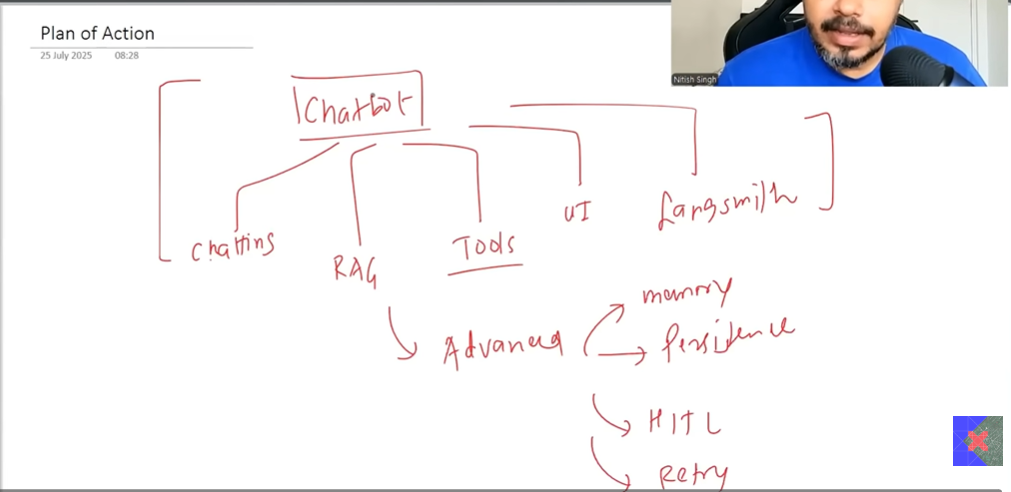

In [11]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Annotated
from langchain_core.messages import BaseMessage, HumanMessage
from langchain_openai import ChatOpenAI
from langgraph.checkpoint.memory import MemorySaver

In [12]:
from langgraph.graph.message import add_messages

class ChatState(TypedDict):

    messages: Annotated[list[BaseMessage], add_messages]

In [13]:
llm = ChatOpenAI()


def chat_node(state: ChatState):

    # take user query from state
    messages = state['messages']

    # send to llm
    response = llm.invoke(messages)

    # response store state
    return {'messages': [response]}

In [14]:
checkpointer=MemorySaver()
graph = StateGraph(ChatState)

# add nodes
graph.add_node('chat_node', chat_node)

graph.add_edge(START, 'chat_node')
graph.add_edge('chat_node', END)

chatbot = graph.compile(checkpointer=checkpointer)

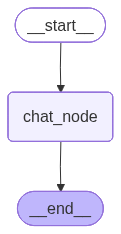

In [15]:
chatbot

In [6]:
initial_state = {
    'messages': [HumanMessage(content='What is the capital of Uttar Pradesh')]
}

chatbot.invoke(initial_state)['messages'][-1].content

'The capital of Uttar Pradesh is Lucknow.'

In [17]:
thread_id='1'
while True:
    user_messages=input('Type here: ')
    print("user :",user_messages)
    if user_messages.strip().lower() in ['exit','quit','bye']:
        break
    config={'configurable':{'thread_id':thread_id}}
    response=chatbot.invoke({'messages':[HumanMessage(content=user_messages)]},config=config)
    print('AI:',response['messages'][-1].content)

user : Hi
AI: Hello! How can I assist you today?
user : My age is 32 and Name is Anish kumar Maurya state U.P
AI: Nice to meet you, Anish Kumar Maurya! How can I help you today?
user : What is my state
AI: Your state is Uttar Pradesh (U.P).
user : and my name 
AI: Your name is Anish Kumar Maurya.
user : mutiply 2 wit 2
AI: 2 multiplied by 2 is equal to 4.
user : also adiition and division of both number
AI: Sure! 

Addition: 2 + 2 = 4
Division: 2 / 2 = 1
user : exit


# Now We ADD the concept of Persistance

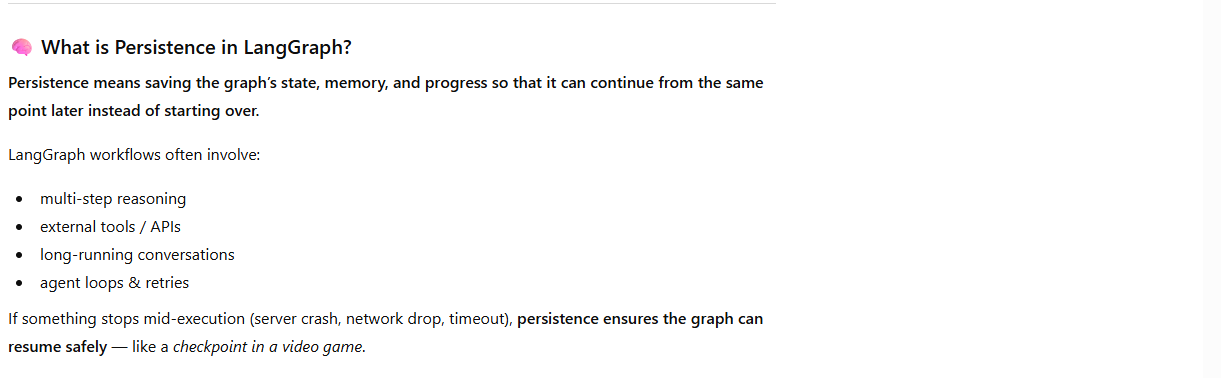

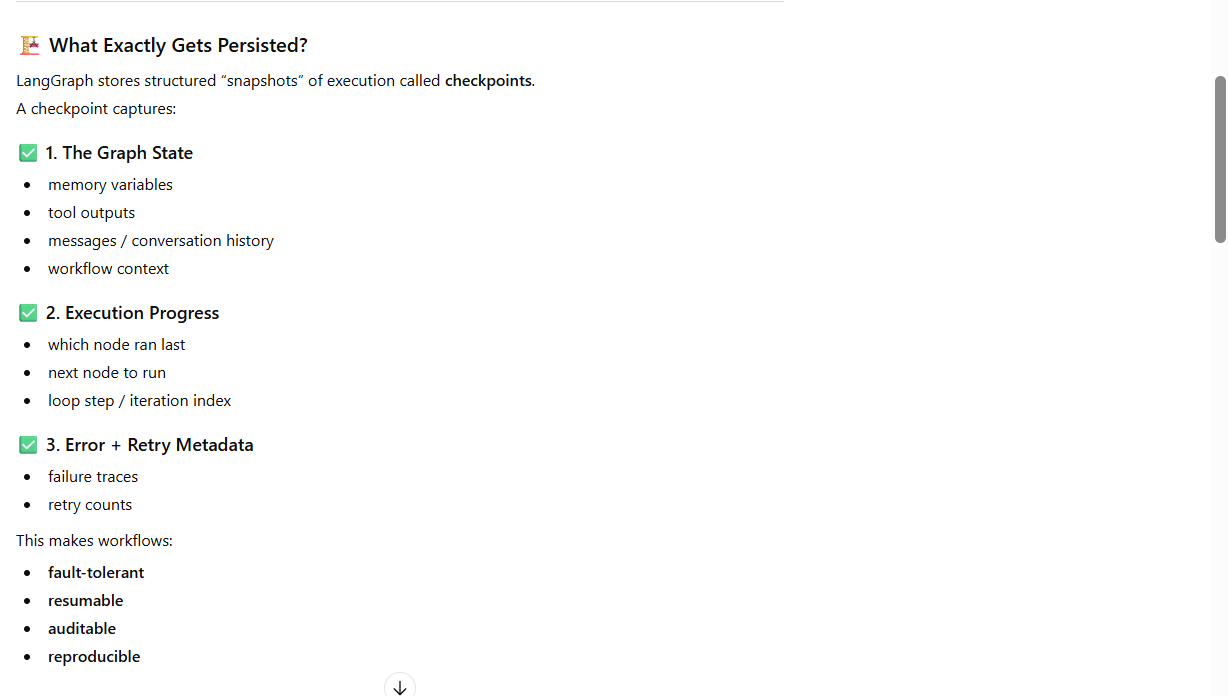

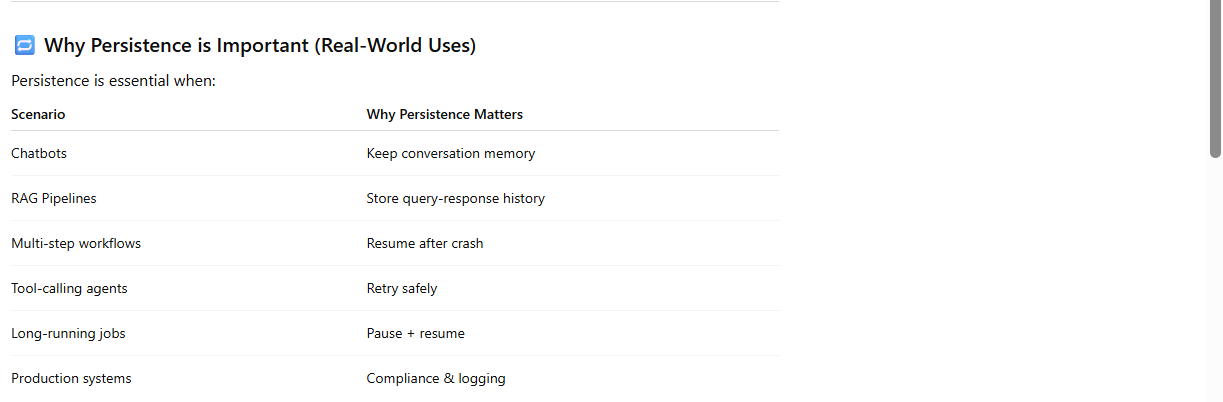

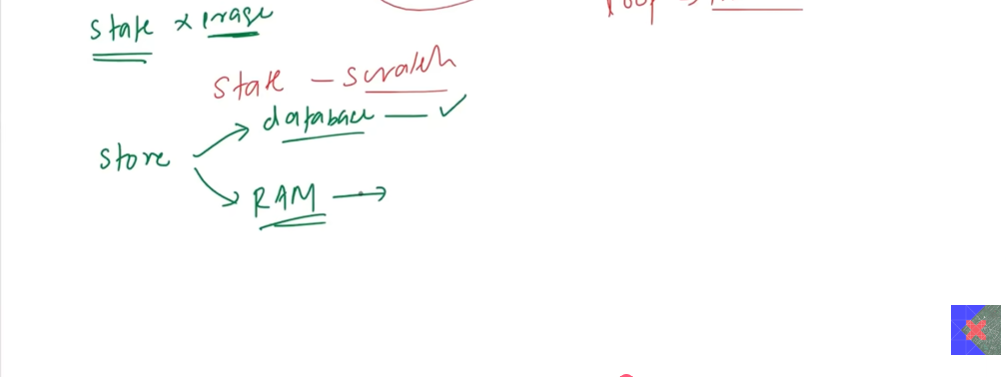